# Heatmap (using regex)
## Used to check out correlations and for preliminary feature exclusion

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

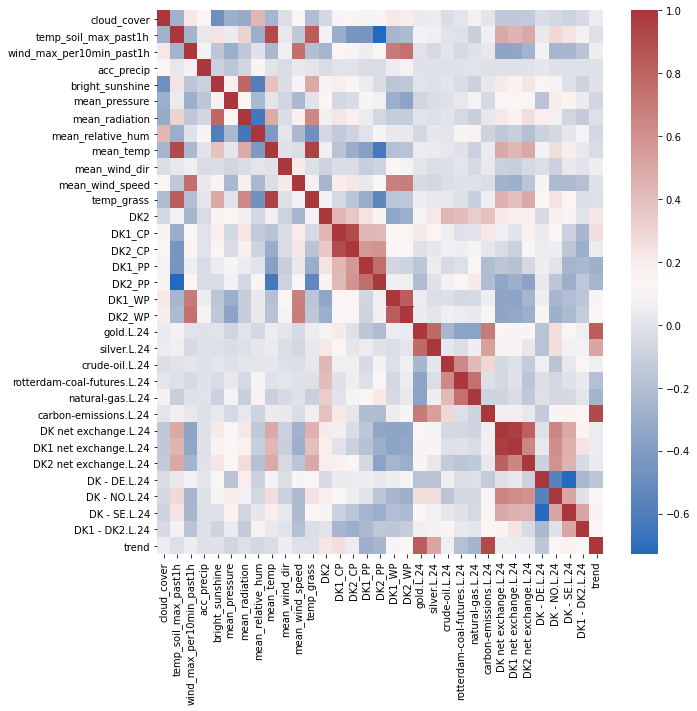

In [15]:
# cols = second_merge.columns[2:]

# #cm = np.corrcoef(second_merge[cols].values.T)
# sns.set(font_scale=0.5)


data_hm = pd.read_csv('dfV3.csv')
data_hm["Unnamed: 0"] = pd.to_datetime(data_hm["Unnamed: 0"])
data_hm = data_hm.set_index('Unnamed: 0')


l = []
for column in data_hm.columns:      # Loop to remove all the variables that have been lagged several times and all dummies using REGEX
    if len(re.findall(r'\_\d|^DK2.L', column)) > 0:
        pass
    else:
        l.append(column)

data_hm = data_hm[l]              

fig, ax = plt.subplots(figsize=(10,10))
hm_all = sns.heatmap(pd.DataFrame(data_hm.corr()), cmap = 'vlag', annot = False)    # Heatmap with ALL correlations
# hm_DK2 = sns.heatmap(pd.DataFrame(data_hm.corr()['DK2']).sort_values(by = 'DK2'), cmap = 'vlag', annot = True)    # Heatmap with ONLY DK2-correlations 
plt.show()